# ***K-Means Algorithm***

In [25]:
# import the libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

In [27]:
data = pd.read_csv('Wholesale data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [29]:
# stats of the data 

data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [31]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |
 |  K-Means clustering.
 |
 |  Read more in the :ref:`User Guide <k_means>`.
 |
 |  Parameters
 |  ----------
 |
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall ine

In [33]:
kmeans = KMeans(n_clusters = 2, init='k-means++')

kmeans.fit(data_scaled)

kmeans.inertia_

2599.3873849123092

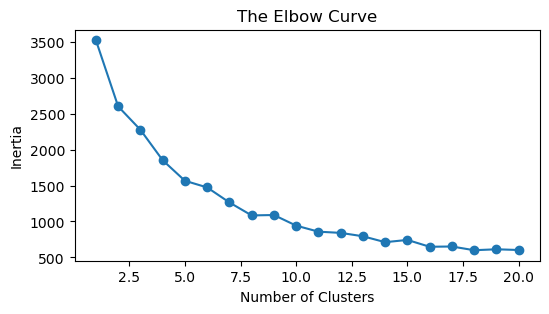

In [41]:
wcss = []

for cluster in range(1, 21):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (6, 3))
plt.plot(range(1, 21), wcss, marker = 'o')
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [43]:
# Build the model with the 6 clusters


kmeans = KMeans(n_clusters = 6, init = 'k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

df = pd.DataFrame(data_scaled)
df.head()

,0,1,2,3,4,5,6,7
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [45]:
df['cluster'] = pred
df.head()

,0,1,2,3,4,5,6,7,cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0


In [47]:
df.tail()

,0,1,2,3,4,5,6,7,cluster
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,3
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,3
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,1
439,-0.690297,0.590668,-0.729307,-0.555924,-0.573227,-0.620094,-0.504888,-0.522869,1


In [49]:
df.head(20)

,0,1,2,3,4,5,6,7,cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,1
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0
5,1.448652,0.590668,-0.204806,0.334067,-0.297637,-0.496155,-0.228138,-0.026224,0
6,1.448652,0.590668,0.009950,-0.352316,-0.102849,-0.534512,0.054280,-0.347854,0
7,1.448652,0.590668,-0.349981,-0.113981,0.155359,-0.289315,0.092286,0.369601,0
8,-0.690297,0.590668,-0.477901,-0.291409,-0.185336,-0.545854,-0.244726,-0.275079,1
9,1.448652,0.590668,-0.474497,0.718495,1.151423,-0.394488,0.954031,0.203461,0


In [51]:
df['cluster'].value_counts()

cluster
1    252
0    129
3     46
2     10
4      2
5      1
Name: count, dtype: int64

In [1]:
# Function to take input, standardize it, and predict the cluster
def get_cluster_prediction():
    # Collecting user for each feature
    Channel = int(input("Enter Channel (e.g., 1, 2): "))
    Region = int(input("Enter Region (e.g., 1, 2, 3 ): "))
    Fresh = float(input("Enter annual spending on Fresh products: "))
    Milk = float(input("Enter annual spending on Milk: "))
    Grocery = float(input("Enter annual spending on Grocery: "))
    Frozen = float(input("Enter annual spending on Frozen products: "))
    Detergents_Paper = float(input("Enter annual spending on Detergents_Paper: "))
    Delicassen = float(input("Enter annual spending on Delicassen: "))
    # Create a data point with the input values
    user_data = np.array([[Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]])
    # Standardize the user input using the already fitted scaler
    user_data_scaled = scaler.transform(user_data)
    # Predict the cluster using the clustering model
    cluster = kmeans.predict(user_data_scaled)
    # Output the predicted cluster 
    print(f"The customer belongs to cluster: {cluster[0]}")

In [ ]:
get_cluster_prediction()

Enter Channel (e.g., 1, 2):  1
Enter Region (e.g., 1, 2, 3 ):  3
Enter annual spending on Fresh products:  25456
Enter annual spending on Milk:  9000
Enter annual spending on Grocery:  2500
